In [ ]:
# mlp for multiclass classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
import pandas as pd
dataset = pd.read_csv(r"/Users/oscarine/TA/iris.csv")
dataset.shape

(149, 5)

In [3]:
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
dataset.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Data Exploration
print(dataset.info)

<bound method DataFrame.info of      5.1  3.5  1.4  0.2     Iris-setosa
0    4.9  3.0  1.4  0.2     Iris-setosa
1    4.7  3.2  1.3  0.2     Iris-setosa
2    4.6  3.1  1.5  0.2     Iris-setosa
3    5.0  3.6  1.4  0.2     Iris-setosa
4    5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...             ...
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 5 columns]>


In [6]:
dataset.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
import pandas as pd
pd.isnull(dataset)

,5.1,3.5,1.4,0.2,Iris-setosa
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


In [ ]:
import tensorflow as tf
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# load the data
import pandas as pd
df = pd.read_csv(r"/Users/oscarine/TA/iris.csv")


In [12]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [13]:
# ensure that all data are floating point values
X = X.astype("float32")

In [15]:
# encode strings to interger
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [17]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(99, 4) (50, 4) (99,) (50,)


In [18]:
# determine the number of input features
n_features = X_train.shape[1]



In [26]:
# define model
import tensorflow as tf
from numpy import argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation="relu", kernel_initializer="he_normal", input_shape=(n_features,)))
model.add(Dense(8, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(3, activation="softmax"))


In [27]:
# compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [48]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [30]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.3f" % acc)

Test Accuracy: 1.000


In [31]:
#make a prediction
row =[5.1, 3.5, 1.4, 0.2]
yhat = model.predict([row])
print("Predicted: %s (class=%d)" % (yhat, argmax(yhat)))

Predicted: [[9.8794055e-01 1.2057901e-02 1.5087785e-06]] (class=0)


In [32]:
# summarizing the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [38]:
# plotting the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


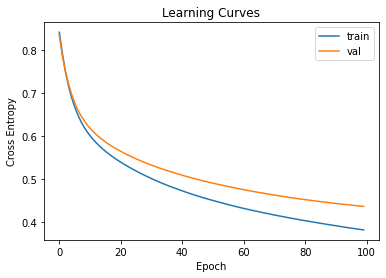

In [37]:


#  plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
